## Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from utils import *
from implementations import *
from feature_filling import *
%load_ext autoreload
%autoreload 2

## Load the data

In [2]:
y, X, ids = load_csv_data(path="resources/train.csv")

print("Input data shape", X.shape)
print("Labels data shape", y.shape)

Input data shape (250000, 30)
Labels data shape (250000,)


In [3]:
X[:, 0]

array([ 138.47 ,  160.937, -999.   , ...,  105.457,   94.951, -999.   ])

In [4]:
X[X == -999] = np.NaN
# print(X[:, 1])
y[np.where(y == -1)] = 0
y

array([1., 0., 0., ..., 1., 0., 0.])

In [5]:
X = np.concatenate(((np.isnan(X[:, 0]) * 1).reshape(-1, 1), X), axis=1)

In [6]:
x_tr, x_val, y_tr, y_val = split_data(X, y, 0.8)

print("Training data shapes", x_tr.shape, y_tr.shape)
print("Validation data shapes", x_val.shape, y_val.shape)

Training data shapes (200000, 31) (200000,)
Validation data shapes (50000, 31) (50000,)


## Fill the data

In [7]:
columns_with_missing_features, feature_medians = calculate_feature_medians(x_tr)

#print(columns_with_missing_features)
#print(feature_medians.shape)

In [8]:
x_tr = fill_features_with_median(x_tr, columns_with_missing_features, feature_medians)
x_tr[:,12]

array([-1.407,  0.098, -1.252, ...,  1.4  ,  1.065,  1.391])

In [9]:
np.isnan(x_tr).sum()

0

In [10]:
x_val = fill_features_with_median(x_val, columns_with_missing_features, feature_medians)

In [11]:
np.isnan(x_val).sum()

0

In [12]:
x_tr = add_bias_term(standardize(x_tr)[0])
x_val = add_bias_term(standardize(x_val)[0])

print("Training data shapes", x_tr.shape)
print("Validation data shapes", x_val.shape)

Training data shapes (200000, 32)
Validation data shapes (50000, 32)


## Train

In [13]:
weights, loss = reg_logistic_regression(
    y_tr, x_tr, 0, np.zeros(x_tr.shape[1]), max_iters=10000, gamma=0.2)

Iteration 1/10000: loss=0.6931471805599453, w=[-0.03938125  0.01866967 -0.0334196  -0.02010621 -0.01843269  0.00932953
  0.01812763 -0.03722409  0.01855995  0.01780075  0.00986949 -0.02842669
  0.01798276  0.01934875  0.01869923  0.00861033  0.01885925  0.01884959
 -0.00313673  0.01886666  0.01884906  0.00108203  0.01888088 -0.05237685
  0.0185891  -0.00828287  0.01885634  0.01886738 -0.00336453  0.01886125
  0.01884937  0.00380876]
Iteration 201/10000: loss=0.5337681232579877, w=[-0.26237985  0.10179331  0.23898818 -1.97831629 -0.21696499  0.52090308
  0.13314037  0.20232616  0.10890038  0.15947458 -0.22506841  0.26410736
  0.07494387  0.20152736  0.13370526  1.09574599  0.12431422  0.12070332
 -0.1774287   0.1241674   0.13161011 -0.14469863  0.12871657 -0.06818461
  0.12746209 -0.29072068  0.12445398  0.1268589  -0.29961453  0.12677232
  0.12318643 -0.40297053]
Iteration 401/10000: loss=0.5316529920373944, w=[-2.72532339e-01  9.31102559e-02  3.12459629e-01 -2.15478044e+00
 -4.0930406

In [14]:
print("Training score", compute_score(y_tr, x_tr, weights))
print("Validation score", compute_score(y_val, x_val, weights))

Training score 0.73805
Validation score 0.73776


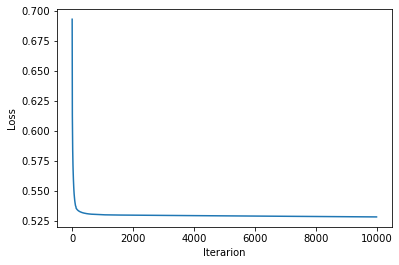

In [15]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Iterarion")
plt.ylabel("Loss")
plt.show()

## Testing

In [25]:
_, XTest, idsTest = load_csv_data(path="resources/test.csv")

print("Input data shape", XTest.shape)
# print("Labels data shape", y.shape)

Input data shape (568238, 30)


In [26]:
XTest[XTest == -999] = np.NaN
XTest = np.concatenate(((np.isnan(XTest[:, 0]) * 1).reshape(-1, 1), X), axis=1)

In [27]:
print(columns_with_missing_features)
print(feature_medians)
print(np.where(np.any(np.isnan(XTest), axis=0))[0])

[ 1  5  6  7 13 24 25 26 27 28 29]
[ 1.12365e+02  2.11200e+00  2.26500e+02 -2.55000e-01  4.58000e-01
  6.54370e+01  1.00000e-03 -3.50000e-02  4.79020e+01 -1.10000e-02
 -2.00000e-03]
[ 0  4  5  6 12 23 24 25 26 27 28]


In [21]:


XTest = fill_features_with_median(XTest, columns_with_missing_features, feature_medians)
np.isnan(XTest).sum()

1119538

In [18]:
XTest = add_bias_term(standardize(XTest)[0])
XTest.shape

(568238, 31)

In [19]:
yTest = np.array([predictions(x, weights) for x in XTest])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 32 is different from 31)

In [ ]:
yTest[np.where(yTest == 0)] = -1
print(yTest)

[-1 -1 -1 ...  1 -1 -1]


In [ ]:
create_csv_submission(idsTest, yTest, "02.csv")

In [ ]:
(yTest==1).sum()/len(yTest)

0.2407617934738613